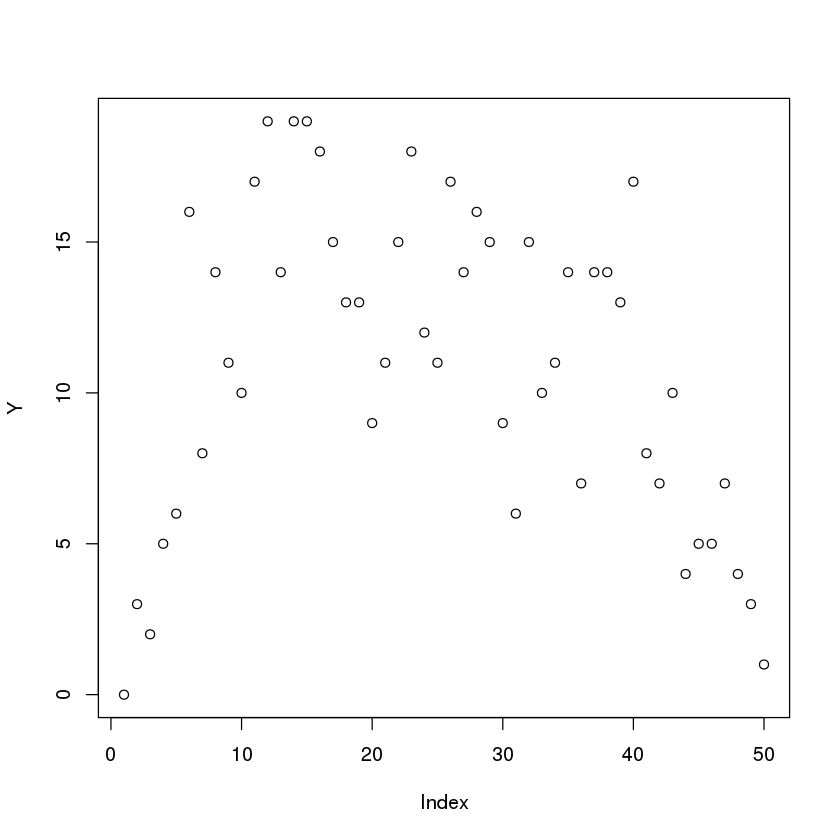

In [6]:
load("Y.RData")
plot(Y)

In [9]:
summary(Y)
var(Y)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    7.00   11.00   10.88   15.00   19.00 

[1] 27.37306

In [ ]:
平均 10.88 に対して、分散 27.37 と、過分散になっている。

In [14]:
library(rjags)
Adj <- c(sapply(2:(length(Y) - 1), function(a) c(a - 1, a + 1)))

list.data <- list(
    N.site = length(Y),
    Y = Y,
    Adj = c(2, Adj, length(Y) - 1),
    Weights = rep(1, 2 * length(Y) - 2),
    Num = c(1, rep(2, length(Y) - 2), 1)

)

inits <- list(
    beta = 0,
    r = rnorm(length(Y), 0, 0.1),
    s = 1
)

m <- jags.model(
    file = "car.bug.txt",
    data = list.data,
    inits = inits,
    n.chains = 3
)

update(m, 100)

x <- coda.samples(
    m,
    c("beta", "s", "r[1]", "r[2]", "r[3]"),
    thin = 10,
    n.iter = 10000
)

print(summary(x))
plot(x)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Deleting model



ERROR: Error in jags.model(file = "car.bug.txt", data = list.data, inits = inits, : RUNTIME ERROR:
Compilation error on line 7.
Unknown distribution: car.normal




ERROR: Error in object[[name, exact = TRUE]]:  添え字が許される範囲外です 


ERROR: Error in model$iter: $ operator is invalid for atomic vectors


ERROR: Error in summary(x):  オブジェクト 'x' がありません 


ERROR: Error in plot(x):  オブジェクト 'x' がありません 


JAGS には car.normal が実装されていない。。